In [36]:
import random
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Probabilidade de Vitória de Cada Carro:
Red Bull RB24: 50.00%
Mercedes W14: 50.00%
Ferrari SF24: 0.00%
McLaren MCL36: 0.00%
Alpine A524: 0.00%
Aston Martin AMR24: 0.00%
Alfa Romeo C44: 0.00%
Haas VF-24: 0.00%
AlphaTauri AT04: 0.00%
Williams FW46: 0.00%


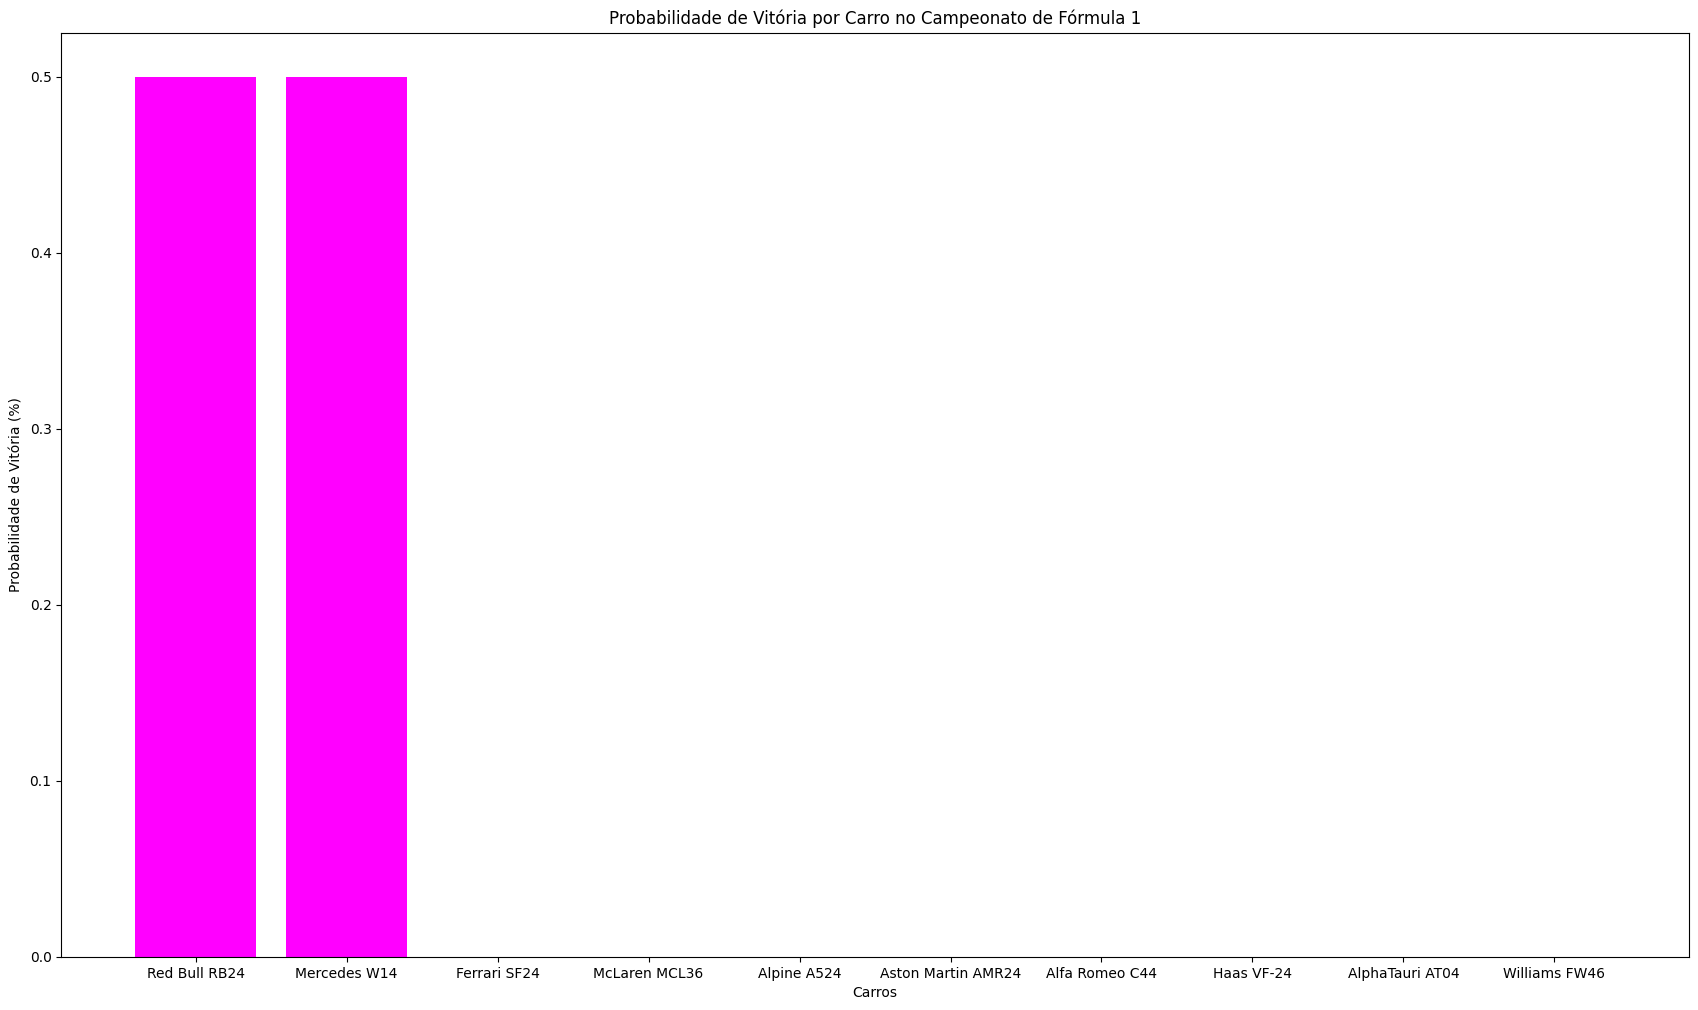

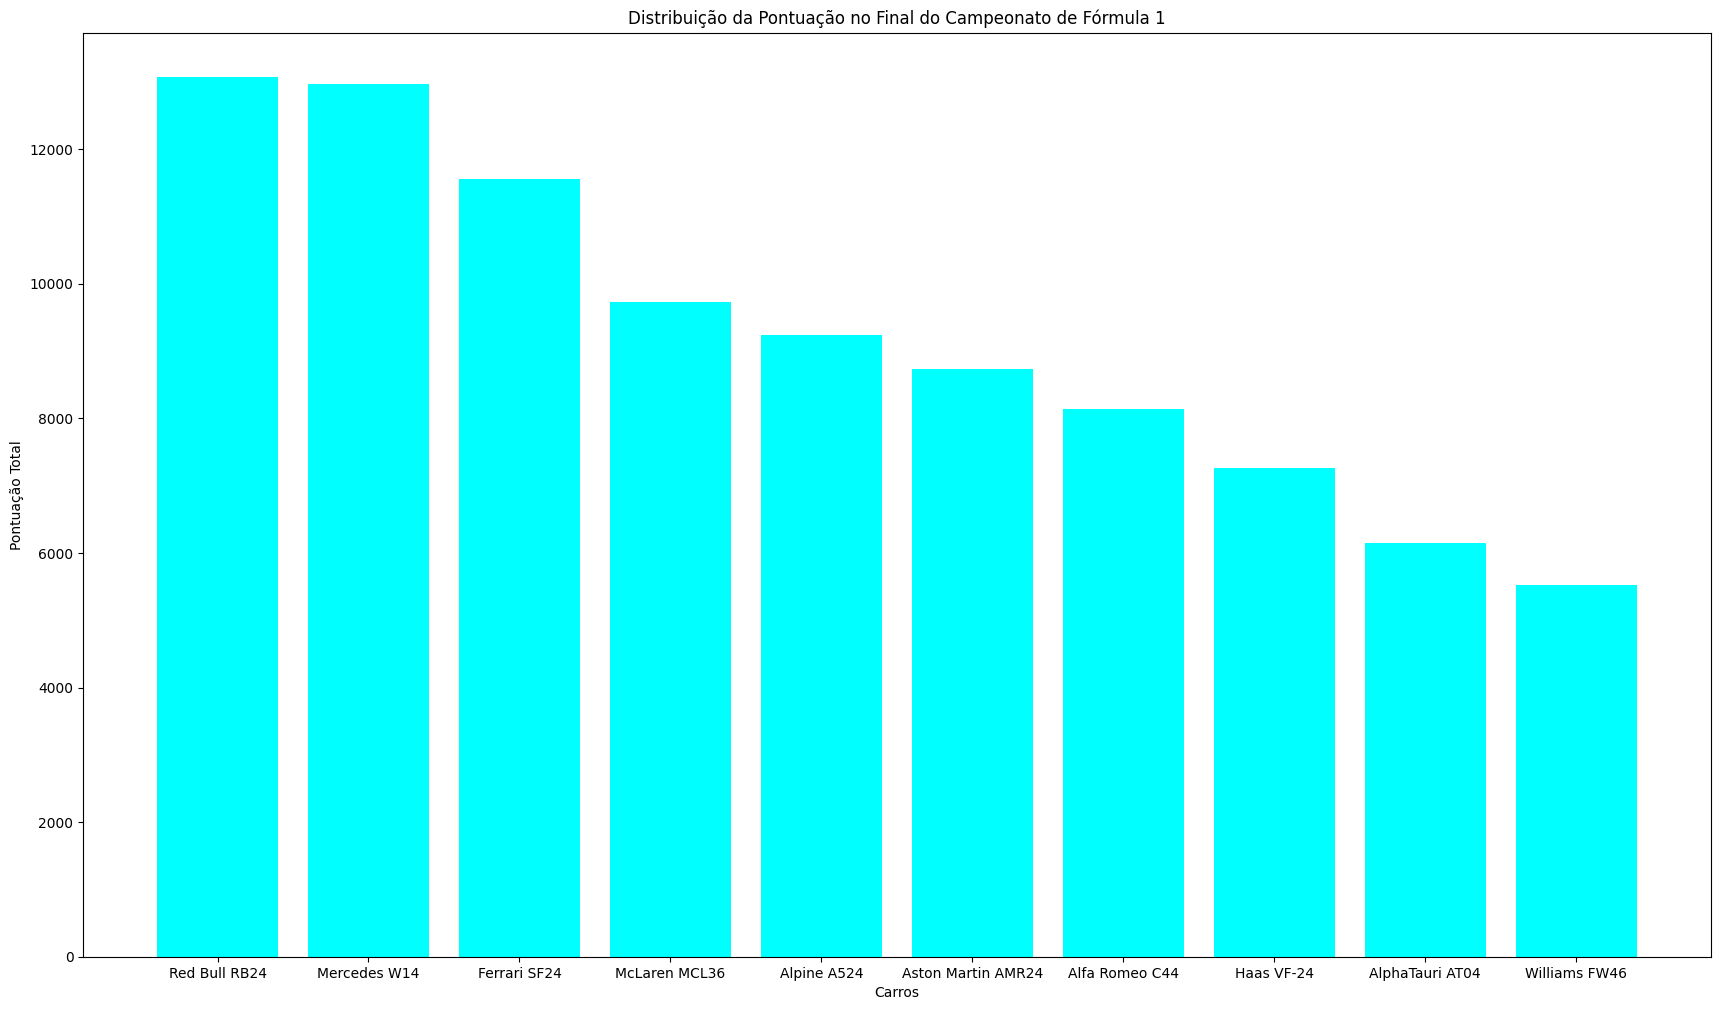

In [49]:
class F1Car:
    def __init__(self, name, max_speed, acceleration, reliability):
        self.name = name
        self.max_speed = max_speed
        self.acceleration = acceleration
        self.reliability = reliability

    def simulate_lap_time(self, track_condition, tire_choice):
        if random.random() > self.reliability:
            return float('inf')  # Simula uma falha do carro
        speed_adjustment = random.uniform(0.95, 1.05)
        tire_effect = tire_choice * random.uniform(0.9, 1.1)
        return 120 + (200 - self.max_speed * speed_adjustment) * tire_effect

class Race:
    def __init__(self, cars, num_laps=70, track_conditions=('Dry', 'Wet', 'Icy')):
        self.cars = cars
        self.num_laps = num_laps
        self.track_conditions = track_conditions
        self.tires = {
            'Dry': {'Soft': 0.95, 'Medium': 1.0, 'Hard': 1.05},
            'Wet': {'Rain': 0.95},
            'Icy': {'Rain': 1.2, 'Hard': 1.5}
        }

    def run_race(self):
        results = {car.name: 0 for car in self.cars}
        track_condition = random.choice(self.track_conditions)
        tire_choice = random.choice(list(self.tires[track_condition].keys()))
        for _ in range(self.num_laps):
            lap_times = {car.name: car.simulate_lap_time(track_condition, self.tires[track_condition][tire_choice]) for car in self.cars}
            sorted_lap_times = sorted(lap_times.items(), key=lambda x: x[1])
            for i, (car_name, _) in enumerate(sorted_lap_times):
                results[car_name] += len(self.cars) - i
        return track_condition, tire_choice, results

def championship(cars, num_races=24):
    championship_results = []
    wins_count = {car.name: 0 for car in cars}
    total_scores = {car.name: 0 for car in cars}
    for _ in range(num_races):
        race = Race(cars)
        condition, tire, results = race.run_race()
        first_place = max(results, key=results.get)
        wins_count[first_place] += 1
        for car_name, score in results.items():
            total_scores[car_name] += score
        championship_results.append((condition, tire, results))
    return championship_results, wins_count, total_scores

def analyze_results(championship_results, wins_count, cars):
    total_races = len(championship_results)
    win_probabilities = {car.name: wins_count[car.name] / total_races for car in cars}
    sorted_win_probs = sorted(win_probabilities.items(), key=lambda x: x[1], reverse=True)
    return sorted_win_probs

def main():
    cars = [
        F1Car("Red Bull RB24", 330, 3.8, 0.98),
        F1Car("Mercedes W14", 329, 3.6, 0.99),
        F1Car("Ferrari SF24", 325, 3.9, 0.97),
        F1Car("McLaren MCL36", 320, 3.7, 0.95),
        F1Car("Alpine A524", 318, 3.6, 0.94),
        F1Car("Aston Martin AMR24", 317, 3.4, 0.93),
        F1Car("Alfa Romeo C44", 315, 3.5, 0.92),
        F1Car("Haas VF-24", 313, 3.3, 0.90),
        F1Car("AlphaTauri AT04", 310, 3.4, 0.88),
        F1Car("Williams FW46", 308, 3.2, 0.86)
    ]
    results, wins_count, total_scores = championship(cars)
    win_probabilities = analyze_results(results, wins_count, cars)

    # Printing win probabilities
    print("Probabilidade de Vitória de Cada Carro:")
    for car, probability in win_probabilities:
        print(f"{car}: {probability:.2%}")

    # Visualização gráfica das probabilidades de vitória
    plt.figure(figsize=(21, 12))
    plt.bar([car for car, _ in win_probabilities], [prob for _, prob in win_probabilities], color='magenta')
    plt.xlabel('Carros')
    plt.ylabel('Probabilidade de Vitória (%)')
    plt.title('Probabilidade de Vitória por Carro no Campeonato de Fórmula 1')
    plt.show()

    plt.figure(figsize=(21, 12))
    plt.bar(total_scores.keys(), total_scores.values(), color='cyan')
    plt.xlabel('Carros')
    plt.ylabel('Pontuação Total')
    plt.title('Distribuição da Pontuação no Final do Campeonato de Fórmula 1')
    plt.show()

if __name__ == "__main__":
    main()